In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
% matplotlib inline

from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

train = pd.read_csv("bank-full.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"    45211 non-null object
dtypes: object(1)
memory usage: 353.3+ KB


In [ ]:
train.describe()

In [ ]:
train.head(10)

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
sns.heatmap(train.corr(),annot=True)

In [ ]:
#sns.pairplot(train,hue='y',palette='bwr')

In [ ]:
train["y"].value_counts()

In [ ]:
sns.countplot(data=train,hue="y",x="education",palette="viridis")

In [ ]:
# Let's see how the numeric data is distributed.
plt.style.use('seaborn-whitegrid')
#plt.style.use('dark_background')
train.hist(bins=20, figsize=(14,10))
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="y",
                    data=train, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

g1 = sns.boxplot(x="job", y="balance", hue="y",data=train, palette="RdBu", ax=ax2)

g1.set_xticklabels(train["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=train, x="education", y="balance", hue="y", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

In [ ]:
sns.countplot(x="loan", data=train)
plt.show()

In [ ]:
sns.countplot(x="housing", data=train)
plt.show()

In [ ]:
sns.countplot(x="poutcome", data=train)
plt.show()

In [ ]:
sns.countplot(y="job", data=train)
plt.show()

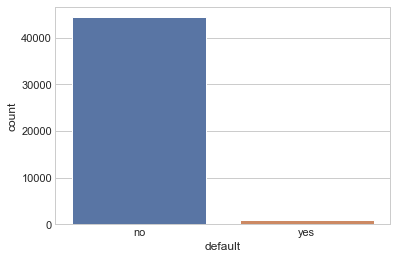

In [20]:
sns.countplot(x="default", data=train)
plt.show()

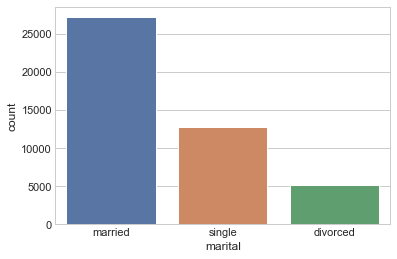

In [21]:
sns.countplot(x="marital", data=train)
plt.show()

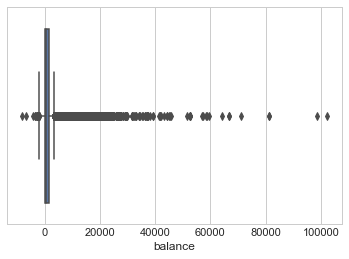

In [22]:
sns.boxplot(data=train,x='balance')

In [23]:
# removing outliers
train['balance'].where(train['balance']>60000).count()

8

In [24]:
train['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [25]:
# Combine similar jobs into categiroes
train['job'] = train['job'].replace(['management', 'admin.'], 'admin/manag')
train['job'] = train['job'].replace(['services','housemaid'], 'home/service')
train['job'] = train['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'unemployed')

In [26]:
train.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [27]:
# combine other and unknown category into failure because only success and failure matters
train['poutcome'] = train['poutcome'].replace(['other'] , 'failure')
train['poutcome'] = train['poutcome'].replace(['unknown'] , 'failure')
train.poutcome.value_counts()

failure    43700
success     1511
Name: poutcome, dtype: int64

In [28]:
train['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [29]:
# values for "default" : yes/no
train['default'] = train['default'].map( {'yes':1, 'no':0} )

In [30]:
train['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [31]:
# values for "housing" : yes/no
train["housing"]=train['housing'].map({'yes':1, 'no':0})

In [32]:
# values for "loan" : yes/no
train["loan"] = train['loan'].map({'yes':1, 'no':0})

In [33]:
#dropping columns that have no literal meanings in prediction
train.drop('contact', axis=1, inplace=True)
train.drop('month', axis=1, inplace=True)
train.drop('day', axis=1, inplace=True)

In [34]:
# converting age column into categories
def impute_age(data):
    if (data['age'] < 18):
        return "Child"
    elif (data['age'] < 35) & (data['age'] >= 18):
        return "Adult"
    elif (data['age'] < 60) & (data['age'] >= 35):
        return "Middle_Aged"
    else:
        return "Old"

In [35]:
train['age']=train.apply(impute_age,axis=1)

In [36]:
train['age'].value_counts()

Middle_Aged    28414
Adult          15013
Old             1784
Name: age, dtype: int64

In [37]:
train['y'] = train['y'].map({'yes':1, 'no':0})

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
age          45211 non-null object
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null int64
balance      45211 non-null int64
housing      45211 non-null int64
loan         45211 non-null int64
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null int64
dtypes: int64(9), object(5)
memory usage: 4.8+ MB


In [39]:
# converting seconds to minutes
train['duration']=train['duration']/60

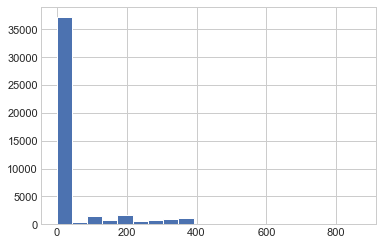

In [40]:
train['pdays'].hist(bins=20)

In [41]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
#train.loc[train['pdays'] == -1, 'pdays'] = 10000

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
age          45211 non-null object
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null int64
balance      45211 non-null int64
housing      45211 non-null int64
loan         45211 non-null int64
duration     45211 non-null float64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 4.8+ MB


In [43]:
data=train

In [44]:
data2 = pd.get_dummies(data, columns =['age','job', 'marital','education','poutcome'])

In [45]:
data2.columns

Index(['default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'y', 'age_Adult', 'age_Middle_Aged', 'age_Old',
       'job_admin/manag', 'job_blue-collar', 'job_entrepreneur',
       'job_home/service', 'job_self-employed', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_failure',
       'poutcome_success'],
      dtype='object')

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

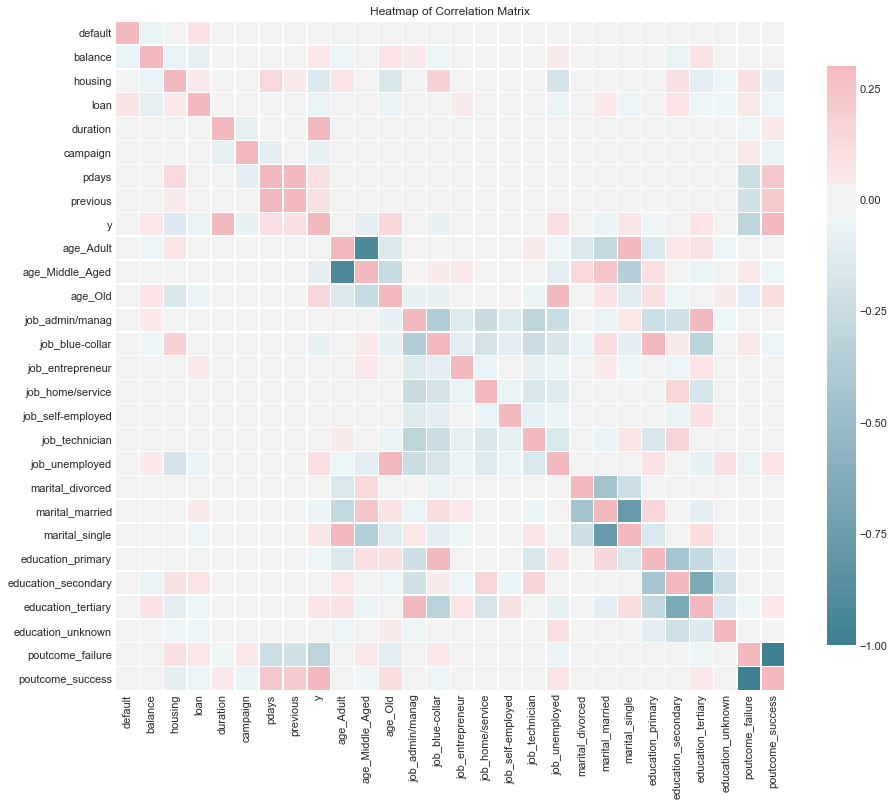

In [46]:
corr = data2.corr()
plt.figure(figsize = (15,13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [47]:
X = data2.drop('y',axis=1)
y = data2['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X.info()

In [48]:
X_train.shape

(33908, 27)

In [49]:
logmodel = LogisticRegression(solver='lbfgs',random_state=0)
logmodel.fit(X_train, y_train)

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
y_pred = logmodel.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9800  178]
 [1010  315]]


In [51]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9978
           1       0.64      0.24      0.35      1325

   micro avg       0.89      0.89      0.89     11303
   macro avg       0.77      0.61      0.64     11303
weighted avg       0.88      0.89      0.87     11303



In [53]:
coef1 = pd.Series(logmodel.coef_.ravel(), list(X_train.columns)).sort_values()
print(coef1)

poutcome_failure      -1.068767
housing               -0.852379
age_Middle_Aged       -0.621528
marital_married       -0.512059
education_secondary   -0.432098
job_blue-collar       -0.334533
loan                  -0.277335
age_Adult             -0.249223
education_primary     -0.227019
job_home/service      -0.172558
marital_single        -0.138042
job_technician        -0.119229
job_admin/manag       -0.118464
marital_divorced      -0.112308
campaign              -0.088948
education_tertiary    -0.066480
job_entrepreneur      -0.055729
education_unknown     -0.036812
job_self-employed     -0.036287
default               -0.033148
balance                0.000029
pdays                  0.002178
previous               0.029212
job_unemployed         0.074390
age_Old                0.108341
duration               0.232369
poutcome_success       0.306357
dtype: float64


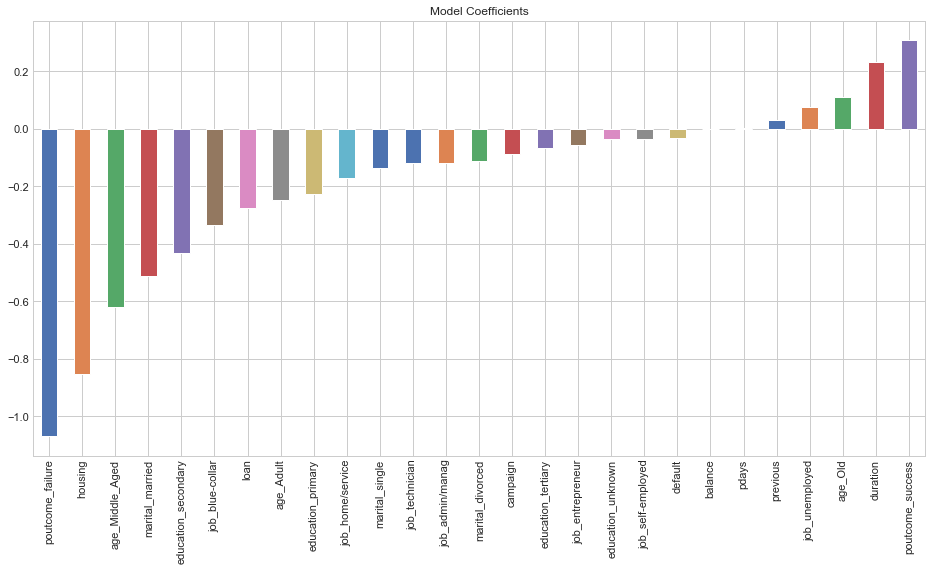

In [54]:
coef1.plot(kind='bar', title='Model Coefficients',figsize=(16,8))

In [55]:
# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [56]:
print(cross_val_score(logmodel, X, y,cv=10))

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs 

[0.90778417 0.91176471 0.9093121  0.88365406 0.89581951 0.8871931
 0.87701836 0.89139571 0.90068569 0.85884956]


/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [57]:
# Learning Curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [58]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


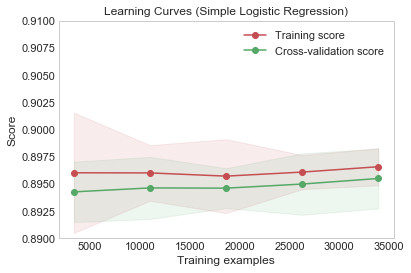

In [59]:
title = "Learning Curves (Simple Logistic Regression)"
cv = ShuffleSplit(n_splits=15, test_size=0.25, random_state=0)
estimator = logmodel
plot_learning_curve(estimator, title, X, y, (0.89,0.91), cv=cv, n_jobs=10)

plt.show()

In [61]:
y_prob=logmodel.predict_proba(X=X)[:,1]

In [62]:
y_prob.shape

(45211,)

In [63]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y,y_prob)

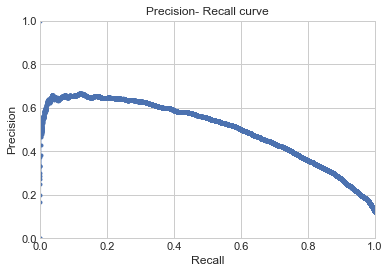

In [64]:
plt.plot(recall,precision,marker='.')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size']=12
plt.title('Precision- Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

In [73]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


print('Precisiom=n Score')
precision_score(y_test, y_pred)



Precisiom=n Score


0.6389452332657201

In [72]:
print('Recall Score')
recall_score(y_test, y_pred)



Recall Score


0.23773584905660378

In [71]:

print('Macro')
recall_score(y_test, y_pred,average='macro')




Macro


0.23773584905660378

In [69]:
print('Micro')
recall_score(y_test, y_pred,average='micro')



Micro


0.894895160576838

In [70]:
print('Weighted')
recall_score(y_test, y_pred,average='weighted')



Weighted


0.894895160576838